In [1]:
import pandas as pd
df = pd.read_csv('data/survey_new.csv')

In [15]:
import seaborn as sns

In [2]:
import numpy as np

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
plt.style.available

['seaborn-darkgrid',
 'seaborn-dark-palette',
 'seaborn-poster',
 'seaborn-muted',
 'seaborn-dark',
 'seaborn-bright',
 'seaborn-whitegrid',
 'seaborn-colorblind',
 'seaborn-deep',
 'grayscale',
 'fivethirtyeight',
 'seaborn-notebook',
 'classic',
 'ggplot',
 'dark_background',
 'seaborn-pastel',
 'seaborn-talk',
 'bmh',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-paper']

In [13]:
plt.style.use("ggplot")

In [6]:
df.columns

Index(['Are.you.on.the.waiting.list.', 'Program',
       'Programming.and.Analytical.Experiences..R..data.manipulation.and.modeling.',
       'What.is.your.preferred.gender.pronoun.',
       'What.code.text.editor.do.you.use.most.',
       'Programming.and.Analytical.Experiences..R..graphic.basics..base..lattice..grid.etc....',
       'Programming.and.Analytical.Experiences..R..advanced..multivariate.data.analysis..e.g..spatiotemporal.data..visualization.and.modeling..',
       'Programming.and.Analytical.Experiences..Reproducible.documentation.with.R..e.g..R.Markdown..',
       'Programming.and.Analytical.Experiences..Matlab..data.manipulation..analysis..visualization.and.modeling.',
       'Programming.and.Analytical.Experiences..Github.', 'R', 'Excel', 'SQL',
       'RStudio', 'ggplot2', 'Python', 'Stata', 'dropbox',
       'google drive (formerly docs)', 'regular expressions (grep)', 'Github',
       'shell (terminal / command line)', 'LaTeX', 'Sweave/knitr', 'XML',
       'Web: ht

In [7]:
cols = ['Program','R', 'Excel', 'SQL',
       'RStudio', 'ggplot2', 'Python', 'Stata', 'dropbox',
       'google drive (formerly docs)', 'regular expressions (grep)', 'Github',
       'shell (terminal / command line)', 'LaTeX', 'Sweave/knitr', 'XML',
       'Web: html css js', 'C/C++', 'Matlab', 'SPSS', 'lattice']

In [8]:
tool_names = ['R', 'Excel', 'SQL',
       'RStudio', 'ggplot2', 'Python', 'Stata', 'dropbox',
       'google drive (formerly docs)', 'regular expressions (grep)', 'Github',
       'shell (terminal / command line)', 'LaTeX', 'Sweave/knitr', 'XML',
       'Web: html css js', 'C/C++', 'Matlab', 'SPSS', 'lattice']

In [9]:
tools = df[cols]

In [10]:
for name in tool_names:
    tools[name] = tools[name].apply(int)

/Users/joshua/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [ ]:
tools.to_csv("data/tools.csv", index=False)

In [ ]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

NameError: name 'sns' is not defined

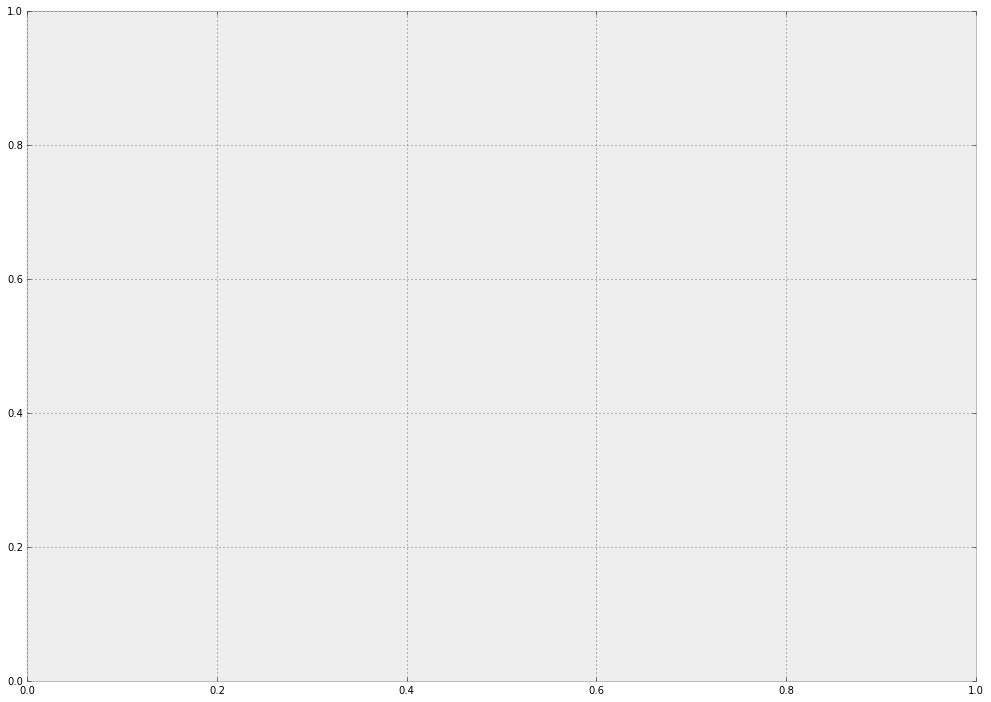

In [11]:
# Compute the correlation matrix
corr = tools.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(17, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax.set_title('Correlation of tool use by all students')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

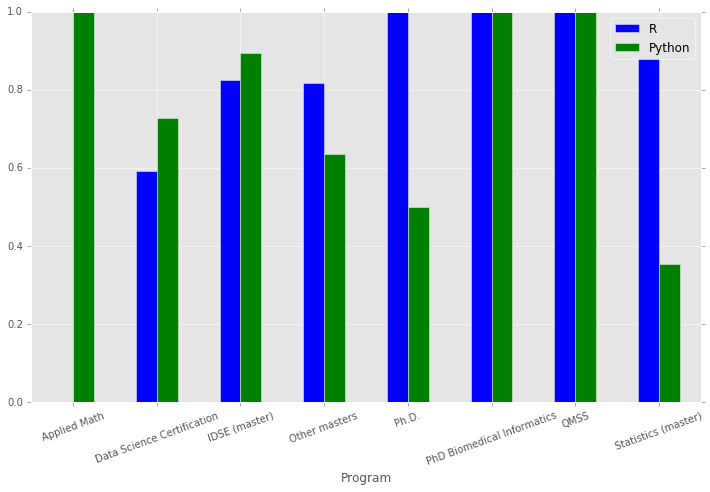

In [14]:
tools.groupby("Program").mean()[["R", "Python"]].plot(kind="bar", figsize=(12, 7), rot=20)

In [ ]:
features = tools[tool_names]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=2))])

transformed_features = pipeline.fit_transform(features)

In [ ]:
pca = PCA(n_components=7)
pca.fit(features)
pca_score = pca.explained_variance_ratio_
V = pca.components_

In [ ]:
pca_score